<a href="https://colab.research.google.com/github/darkginka/Diet-Recommanded-System/blob/main/DRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Start**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
####### dataset #######
food_nutrition = pd.read_csv("/content/drive/MyDrive/dataset/food_nutrition.csv")
disease_nutrition = pd.read_csv("/content/drive/MyDrive/dataset/disease_nutrition.csv",encoding='unicode_escape')

In [ ]:
# food_nutrition.info()
food_nutrition.head()

,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,Lutein and Zeaxanthin,...,Potassium,Sodium,Zinc,Vitamin_A,Vitamin_B12,Vitamin_B6,Vitamin_C,Vitamin_D,Vitamin_E,Vitamin_K
0,Milk,"Milk, human",11000000,7,0,6.89,14,16.0,0.0,0,...,51,17,0.17,61,0.05,0.011,5.0,0.014,0.08,0.3
1,Milk,"Milk, NFS",11100000,4,0,4.87,8,17.9,0.0,0,...,157,39,0.42,59,0.56,0.060,0.1,0.057,0.03,0.2
2,Milk,"Milk, whole",11111000,7,0,4.67,12,17.8,0.0,0,...,150,38,0.41,32,0.54,0.061,0.0,0.056,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,7,0,4.46,14,16.0,0.0,0,...,253,3,0.38,29,0.36,0.034,0.9,0.020,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,7,0,4.67,12,17.8,0.0,0,...,150,38,0.41,32,0.54,0.061,0.0,0.056,0.05,0.3


In [ ]:
disease_nutrition.info()
# disease_nutrition.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   disease_id             92 non-null     int64 
 1   disease                92 non-null     object
 2   ineficient_nutritions  92 non-null     object
 3   Precaution_1           92 non-null     object
 4   Precaution_2           84 non-null     object
 5   Precaution_3           65 non-null     object
 6   Precaution_4           41 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.2+ KB


In [ ]:
# food_nutrition = food_nutrition[food_nutrition["Description"].str.contains("Beaf") == False]
food_nutrition.drop(food_nutrition[food_nutrition['Description'].str.contains("Beaf")].index, inplace = True)
food_nutrition.drop(food_nutrition[food_nutrition['Description'].str.contains("Pork")].index, inplace = True)
food_nutrition.drop(food_nutrition[food_nutrition['Description'].str.contains("Steck")].index, inplace = True)

In [ ]:
food_nutrition.fillna(value = 0, inplace = True)

**Part-1**

In [ ]:
####### Methods #######
def get_disease(disease_name):
	if(disease_name not in list(disease_nutrition["disease"])):
		return False
	else:
		return disease_nutrition[disease_nutrition.disease==disease_name]["disease"].values[0]

def get_disease_id(disease):
	return disease_nutrition[disease_nutrition.disease == disease]["disease_id"].values[0]

def get_disease_ie(disease):
	return disease_nutrition[disease_nutrition.disease == disease]["ineficient_nutritions"].values[0]

In [ ]:
####### get-set Data #######
users_disease = input("Enter Disease Name: ")
disease_name = get_disease(users_disease)
if(disease_name==False):
  print("Disease Not Found")
else:
  disease_id = get_disease_id(disease_name)
  i= disease_id-101
  fd= disease_nutrition.iloc[i]
  pre_list = [fd["Precaution_1"],fd["Precaution_2"],fd["Precaution_3"],fd["Precaution_4"]]
  print("Precauctions: ",pre_list)         
  disease_ie = get_disease_ie(disease_name)
  dis_list = list(disease_ie.split(" "))
  for ele in dis_list:
    if(ele==""):
      dis_list.remove(ele)
  print("Ineficient Nnutritions: ",dis_list)

Enter Disease Name: acne
Precauctions:  ['bath twice', 'avoid fatty spicy food', 'drink plenty of Water', 'avoid too many products']
Ineficient Nnutritions:  ['SaturatedFat', 'Fiber', 'Riboflavin', 'Vitamin_A', 'Zinc', 'Vitamin_D', 'Vitamin_E']


**Part-2**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

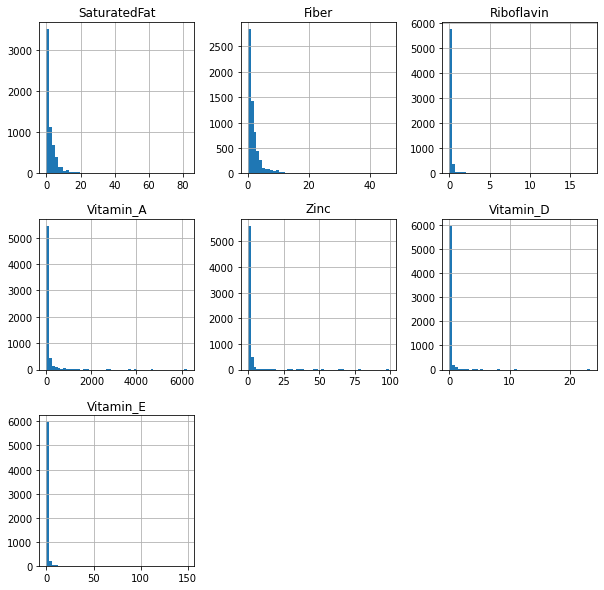

In [ ]:
food_nutrition[dis_list].hist(bins=50, figsize=(10,10))
plt.show()

**Preprocessing data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
columns_to_cluster = dis_list

In [ ]:
#MinMaxScaler
#Transform features by scaling each feature to a given range.Here is an example to scale a data matrix to the [0, 1] range:
mms = MinMaxScaler()
food_scaled = mms.fit_transform(food_nutrition[columns_to_cluster])
print("Scaled Food Value: ", food_scaled[0,:])

Scaled Food Value:  [0.02435152 0.         0.00205714 0.0097522  0.0017196  0.00059893
 0.00053548]


In [ ]:
columns_to_cluster_scaled = dis_list

In [ ]:
df_food_scaled = pd.DataFrame(food_scaled, columns=columns_to_cluster_scaled)

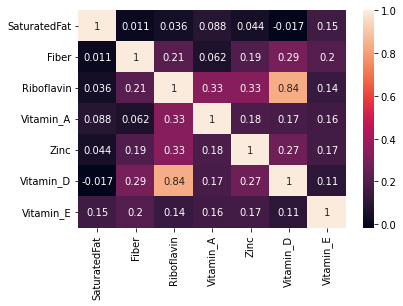

In [ ]:
ax = sns.heatmap(df_food_scaled.corr(), annot=True)
plt.show()

**Training the model**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
n_clusters = range(2,21)
ssd = []
sc = []
dict={}
for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
    km.fit(food_scaled)
    preds = km.predict(food_scaled) 
    centers = km.cluster_centers_ 
    ssd.append(km.inertia_) 
    score = silhouette_score(food_scaled, preds, metric='euclidean')
    sc.append(score)
#calculate the goodness of a clustering
    print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))
    dict[n] = score


Number of Clusters = 2, Silhouette Score = 0.6316996331783699
Number of Clusters = 3, Silhouette Score = 0.587613777027323
Number of Clusters = 4, Silhouette Score = 0.5949705491855426
Number of Clusters = 5, Silhouette Score = 0.3977796489962516
Number of Clusters = 6, Silhouette Score = 0.3962159451856462
Number of Clusters = 7, Silhouette Score = 0.3740986010168658
Number of Clusters = 8, Silhouette Score = 0.37796288073341416
Number of Clusters = 9, Silhouette Score = 0.37214988625650264
Number of Clusters = 10, Silhouette Score = 0.37805292778750144
Number of Clusters = 11, Silhouette Score = 0.37490833590208006
Number of Clusters = 12, Silhouette Score = 0.3824849264136597
Number of Clusters = 13, Silhouette Score = 0.39116206354877187
Number of Clusters = 14, Silhouette Score = 0.34501843344310246
Number of Clusters = 15, Silhouette Score = 0.3308776183800397
Number of Clusters = 16, Silhouette Score = 0.34900297396644325
Number of Clusters = 17, Silhouette Score = 0.30181166818

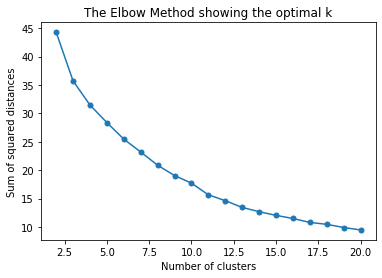

In [ ]:
plt.plot(n_clusters, ssd, marker='.', markersize=10,animated=True)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# kk=[]
# kk.clear()
# for i in range(len(sc)-1):
#   kk.append(sc[i]-sc[i+1])
# k=kk.index(max(kk))+3

In [ ]:
k=6
model = KMeans(n_clusters=k, random_state=42).fit(food_scaled)
pred = model.predict(food_scaled)
# print(pred)
# print(model.labels_)
print('10 first clusters: ', model.labels_[:10])

10 first clusters:  [2 2 2 2 2 2 2 2 2 2]


**Visualizing the clusters**

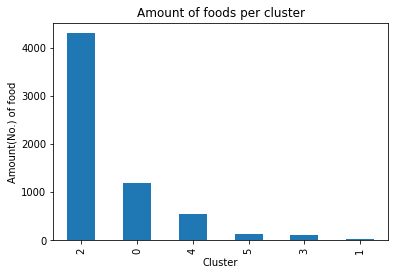

In [ ]:
df_food_scaled['cluster'] = model.labels_
df_food_scaled['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount(No.) of food')
plt.title('Amount of foods per cluster')
plt.show()

In [ ]:
display(df_food_scaled['cluster'].value_counts())
minor_cluster = df_food_scaled['cluster'].value_counts().tail(1)
print("Amount of food in the smallest cluster: ", int(minor_cluster.values))

2    4298
0    1197
4     543
5     132
3     105
1      36
Name: cluster, dtype: int64

Amount of food in the smallest cluster:  36


In [ ]:
df_food_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SaturatedFat  6311 non-null   float64
 1   Fiber         6311 non-null   float64
 2   Riboflavin    6311 non-null   float64
 3   Vitamin_A     6311 non-null   float64
 4   Zinc          6311 non-null   float64
 5   Vitamin_D     6311 non-null   float64
 6   Vitamin_E     6311 non-null   float64
 7   cluster       6311 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 369.9 KB


In [ ]:
food_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311 entries, 0 to 6331
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                6311 non-null   object 
 1   Description             6311 non-null   object 
 2   NutrientDataBankNumber  6311 non-null   int64  
 3   Carotene                6311 non-null   int64  
 4   Cryptoxanthin           6311 non-null   int64  
 5   Carbohydrate            6311 non-null   float64
 6   Cholesterol             6311 non-null   int64  
 7   Choline                 6311 non-null   float64
 8   Fiber                   6311 non-null   float64
 9   Lutein and Zeaxanthin   6311 non-null   int64  
 10  Lycopene                6311 non-null   int64  
 11  Niacin                  6311 non-null   float64
 12  Protein                 6311 non-null   float64
 13  Retinol                 6311 non-null   int64  
 14  Riboflavin              6311 non-null   

In [ ]:
for i in dis_list:
  food_nutrition.drop([i], axis = 1)
  
df_food_joined = pd.concat([food_nutrition,df_food_scaled], axis=1).set_index('cluster')

for cluster in range(k):
    display(df_food_joined.loc[cluster, ['Description']].sample(frac=1).head(10))

,Description
cluster,
0.0,"Pizza with extra meat and extra vegetables, th..."
0.0,"Cheese sandwich, American cheese, on wheat bre..."
0.0,Taquito or flauta with chicken
0.0,"Pie, chocolate cream"
0.0,"Mustard greens, fresh, cooked, fat added"
0.0,"Pizza, with meat, gluten-free thick crust"
0.0,"Butter replacement, powder"
0.0,"Pizza with meat other than pepperoni, from res..."
0.0,"Snack mix, plain (Chex Mix)"


,Description
cluster,
1.0,Cereal (Kellogg's Special K Blueberry)
1.0,Cereal (General Mills Cinnamon Toast Crunch)
1.0,Cereal (General Mills Reese's Puffs)
1.0,"Cocoa powder, not reconstituted"
1.0,Cereal (General Mills Cheerios Chocolate)
1.0,"Cookie, fruit-filled bar"
1.0,Cereal (Kellogg's Frosted Mini-Wheats)
1.0,"Classic mixed vegetables, canned, cooked, fat ..."
1.0,Cereal (Malt-O-Meal Coco-Roos)


,Description
cluster,
2.0,"Oatmeal, instant, other flavors, NS as to fat"
2.0,"Cherries, canned"
2.0,"Chocolate milk, ready to drink, fat free (Nesq..."
2.0,Soft taco with beans
2.0,"Pancakes, with chocolate, from frozen"
2.0,"Fudge, chocolate"
2.0,"Chicken or turkey vegetable soup, home recipe"
2.0,"Noodles with vegetables in tomato-based sauce,..."
2.0,"Chicken or turkey caesar garden salad, chicken..."


,Description
cluster,
3.0,Cereal (Quaker Life)
3.0,"Oysters, coated, baked or broiled, no added fat"
3.0,Cereal (Malt-O-Meal Tootie Fruities)
3.0,"Cereal or granola bar, lowfat, NFS"
3.0,"Seaweed, dried"
3.0,Cereal (Kellogg's Corn Flakes)
3.0,"Nutritional drink or shake, ready-to-drink (En..."
3.0,Cereal (Post Raisin Bran)
3.0,"Oysters, canned"


,Description
cluster,
4.0,"Bread, wheat or cracked wheat, reduced calorie..."
4.0,Almond butter
4.0,"Egg white, omelet, scrambled, or fried, with c..."
4.0,"Soupy rice with chicken, Puerto Rican style"
4.0,"Rice meal fritter, Puerto Rican style"
4.0,Nutrition bar (Clif Bar)
4.0,"Sushi, topped with tuna"
4.0,"Tannier, cooked"
4.0,"Muffin, English"


,Description
cluster,
5.0,Reese's Fast Break
5.0,"Cheese, American, reduced sodium"
5.0,"Stuffed tannier fritters, Puerto Rican style"
5.0,Chocolate-flavored sprinkles
5.0,"Cheese, Parmesan, dry grated"
5.0,"Butter, light"
5.0,"Fruit and vegetable smoothie, non-dairy"
5.0,"Cheese, Camembert"
5.0,"Cheese, Monterey"


In [ ]:
df_food_joined.head(5)

,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,Lutein and Zeaxanthin,...,Vitamin_D,Vitamin_E,Vitamin_K,SaturatedFat,Fiber,Riboflavin,Vitamin_A,Zinc,Vitamin_D,Vitamin_E
cluster,,,,,,,,,,,,,,,,,,,,,
2.0,Milk,"Milk, human",11000000.0,7.0,0.0,6.89,14.0,16.0,0.0,0.0,...,0.014,0.08,0.3,0.024352,0.0,0.002057,0.009752,0.001720,0.000599,0.000535
2.0,Milk,"Milk, NFS",11100000.0,4.0,0.0,4.87,8.0,17.9,0.0,0.0,...,0.057,0.03,0.2,0.014109,0.0,0.007829,0.009432,0.004248,0.002439,0.000201
2.0,Milk,"Milk, whole",11111000.0,7.0,0.0,4.67,12.0,17.8,0.0,0.0,...,0.056,0.05,0.3,0.022545,0.0,0.007886,0.005116,0.004147,0.002396,0.000335
2.0,Milk,"Milk, low sodium, whole",11111100.0,7.0,0.0,4.46,14.0,16.0,0.0,0.0,...,0.020,0.08,0.3,0.026109,0.0,0.006000,0.004636,0.003844,0.000856,0.000535
2.0,Milk,"Milk, calcium fortified, whole",11111150.0,7.0,0.0,4.67,12.0,17.8,0.0,0.0,...,0.056,0.05,0.3,0.022545,0.0,0.007886,0.005116,0.004147,0.002396,0.000335


**Appying Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X=df_food_scaled[columns_to_cluster_scaled]   # Features
y=df_food_scaled['cluster']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
#Train the model using the training sets 
y_pred=clf.predict(X_test)
y_pred

array([2, 0, 2, ..., 2, 0, 4], dtype=int32)

In [45]:
clf.estimators_[0]
sample_tree = clf.estimators_[4]

In [55]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [58]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['N1', 'N2','N3', 'N4','N5', 'N6'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [ ]:
# gph = get_dt_graph(sample_tree)
# Image(gph.create_png())

In [60]:
clf.feature_importances_

array([0.48855532, 0.2541621 , 0.04903799, 0.0416677 , 0.08722007,
       0.04396168, 0.03539513])

In [52]:
imp_df = pd.DataFrame({
    "Nutritions": X_train.columns,
    "Importance": clf.feature_importances_
})

In [54]:
imp_df.sort_values(by="Importance", ascending=False)

,Nutritions,Importance
0,SaturatedFat,0.488555
1,Fiber,0.254162
4,Zinc,0.087220
2,Riboflavin,0.049038
5,Vitamin_D,0.043962
3,Vitamin_A,0.041668
6,Vitamin_E,0.035395


In [43]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9926315789473684


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1289,    0,    7,    0,    0,    0,    0],
       [   0,    4,    0,    0,    0,    1,    0],
       [   8,    0,  353,    0,    0,    0,    2],
       [   0,    1,    0,    3,    0,    0,    0],
       [   0,    0,    1,    0,   34,    0,    0],
       [   1,    0,    0,    0,    0,   41,    1],
       [   1,    0,    0,    0,    0,    0,  153]])

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,index = dis_list,columns = dis_list)

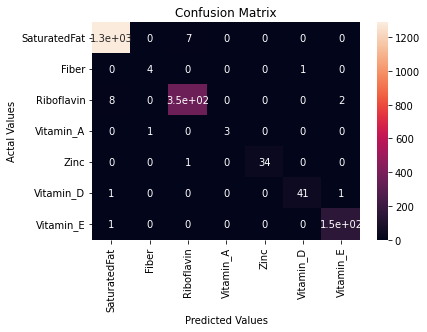

In [ ]:
#Plotting the confusion matrix
ax = sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Applying PCA to visualize the clusters**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=len(dis_list), random_state=42)
food_pca = pca.fit_transform(food_scaled)
pca.explained_variance_ratio_.sum()

1.0000000000000002

In [ ]:
column_list=[]
for i in range(len(dis_list)):
  column_list.append("PC"+str(i))
print(column_list)

['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']


In [ ]:
df_pca = pd.DataFrame(food_pca, columns=column_list)
df_pca['cluster'] = model.labels_
# df_pca.head()
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332 entries, 0 to 6331
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PC0      6332 non-null   float64
 1   PC1      6332 non-null   float64
 2   PC2      6332 non-null   float64
 3   PC3      6332 non-null   float64
 4   PC4      6332 non-null   float64
 5   PC5      6332 non-null   float64
 6   PC6      6332 non-null   float64
 7   cluster  6332 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 371.1 KB


In [ ]:
sampled_clusters_pca = pd.DataFrame()

for c in df_pca.cluster.unique():
    df_cluster_sampled_pca = df_pca[df_pca.cluster == c].sample(n=int(minor_cluster), random_state=42)
    sampled_clusters_pca = pd.concat([sampled_clusters_pca,df_cluster_sampled_pca], axis=0)
sampled_clusters_pca.cluster.value_counts()

0    12
2    12
5    12
4    12
1    12
6    12
3    12
Name: cluster, dtype: int64

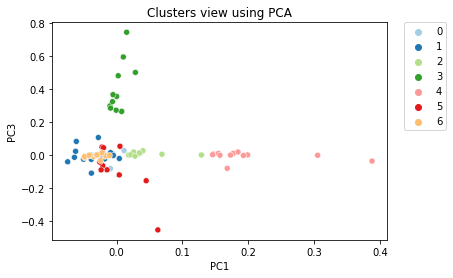

In [ ]:
sns.scatterplot(x='PC1', y='PC3', hue='cluster', data=sampled_clusters_pca, legend="full", palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.show()

In [ ]:
df_user_food_joined = pd.concat([food_nutrition,df_food_scaled], axis=1).set_index('cluster')
for cluster in df_food_scaled['cluster'].unique():
    display(df_user_food_joined.loc[cluster, ['Description']].sample(frac=1).head(10))

,Description
cluster,
0,"Coffee, Iced Cafe Mocha"
0,Soybean curd cheese
0,"Pork with vegetable excluding carrots, broccol..."
0,"Potato, roasted, from fresh, peel eaten, made ..."
0,"Rice, brown, with vegetables, cheese and/or cr..."
0,"Fish, NS as to type, coated, baked or broiled,..."
0,"Oatmeal, made with milk and sugar, Puerto Rica..."
0,"Roll, hard, NS as to major flour"
0,"Pretzels, soft, ready-to-eat, coated or flavored"


,Description
cluster,
2,Lamb or mutton loaf
2,"Cake or cupcake, zucchini"
2,Veal cordon bleu
2,"Cookie, applesauce"
2,"French toast sticks, plain"
2,Egg and cheese on biscuit
2,Puerto Rican white cheese
2,"Ice cream sundae, hot fudge topping"
2,"Pasta with cream sauce, meat, and added vegeta..."


,Description
cluster,
5,Cereal (Malt-O-Meal Coco-Roos)
5,"Margarine-oil blend, stick, light"
5,"Sweet potato, baked, peel not eaten, made with..."
5,Cereal (General Mills Cheerios Honey Nut)
5,"Cereal, crispy rice"
5,Cereal (General Mills Frankenberry)
5,Nutrition bar (Snickers Marathon Protein Bar)
5,Cereal (Kellogg's Honey Smacks)
5,Yeast extract spread


,Description
cluster,
4,"Cereal or granola bar, with coconut, chocolate..."
4,"Cheese, Brick"
4,"Queso Anejo, aged Mexican cheese"
4,"Cookie, macaroon"
4,Chocolate-flavored sprinkles
4,Whipped topping
4,"Shortening, NS as to vegetable or animal"
4,"Cheese, Camembert"
4,"Cereal or granola bar, coated with non-chocola..."


,Description
cluster,
1,"Wheat bran, unprocessed"
1,Cereal (Kashi GOLEAN)
1,Cereal (Post Bran Flakes)
1,Cereal (General Mills Fiber One)
1,Nutritional powder mix (Slim Fast)
1,Cereal (Kashi Heart to Heart Honey Toasted Oat)
1,"Snack cake, not chocolate, with icing or filli..."
1,Yeast
1,Cereal or granola bar (General Mills Fiber One...


,Description
cluster,
6,"Bread, chappatti or roti, wheat"
6,"Muffin, English, whole grain white"
6,"Muffin, oat bran"
6,"Bread, sprouted wheat, toasted"
6,"Chickpeas, from canned, no added fat"
6,"Oatmeal cereal with fruit, baby food, dry, ins..."
6,"Peanut butter and jelly sandwich, with reduced..."
6,Cereal (General Mills Chex Wheat)
6,"Bread, reduced calorie and/or high fiber, whit..."


,Description
cluster,
3,Oyster fritter
3,"Oysters, coated, baked or broiled, no added fat"
3,"Oysters, coated, baked or broiled, fat added"
3,"Oysters, steamed"
3,"Oysters, cooked, NS as to cooking method"
3,"Oysters, baked or broiled, no added fat"
3,"Oysters, coated, fried"
3,"Oysters, smoked"
3,"Oysters, canned"


In [ ]:
# df_user_food_joined.info()
df_user_food_joined.head()

**Recommending Food**

In [ ]:
df_user_food_joined.reset_index(inplace=True)
cluster_pct = df_user_food_joined.cluster.value_counts(normalize=True)*20

if int(cluster_pct.round(0).sum()) < 20:
    cluster_pct[cluster_pct < 0.5] = cluster_pct[cluster_pct < 0.5] + 1.0
    
display(cluster_pct)
print('Total food: ', int(cluster_pct.round(0).sum()))

0    13.474416
2     3.802906
6     1.677195
5     1.473784
4     1.420088
1     1.113708
3     1.037903
Name: cluster, dtype: float64

Total food:  23


In [ ]:
df_food_joined.reset_index(inplace=True)
df_food_joined.head(3)

,cluster,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,...,Vitamin_C,Vitamin_E,Vitamin_K,SaturatedFat,Fiber,Riboflavin,Vitamin_A,Zinc,Vitamin_D,Vitamin_E
0,0,Milk,"Milk, human",11000000,7,0,6.89,14,16.0,0.0,...,5.0,0.08,0.3,0.024352,0.0,0.002057,0.009752,0.001720,0.000599,0.000535
1,0,Milk,"Milk, NFS",11100000,4,0,4.87,8,17.9,0.0,...,0.1,0.03,0.2,0.014109,0.0,0.007829,0.009432,0.004248,0.002439,0.000201
2,0,Milk,"Milk, whole",11111000,7,0,4.67,12,17.8,0.0,...,0.0,0.05,0.3,0.022545,0.0,0.007886,0.005116,0.004147,0.002396,0.000335


In [ ]:
df_user_food_joined['cluster_pct'] = df_user_food_joined['cluster'].apply(lambda c: cluster_pct[c])
df_user_food_joined.drop(columns=columns_to_cluster_scaled, inplace=True)
df_user_food_joined.head(3)

,level_0,index,cluster,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,...,Iron,Magnesium,Phosphorus,Potassium,Sodium,Vitamin_B12,Vitamin_B6,Vitamin_C,Vitamin_K,cluster_pct
0,0,0,0,Milk,"Milk, human",11000000,7,0,6.89,14,...,0.03,3,14,51,17,0.05,0.011,5.0,0.3,13.474416
1,1,1,0,Milk,"Milk, NFS",11100000,4,0,4.87,8,...,0.00,12,103,157,39,0.56,0.060,0.1,0.2,13.474416
2,2,2,0,Milk,"Milk, whole",11111000,7,0,4.67,12,...,0.00,12,101,150,38,0.54,0.061,0.0,0.3,13.474416


In [ ]:
final_Food = pd.DataFrame()

for ncluster, pct in cluster_pct.items():
    foods = df_food_joined[df_food_joined['cluster'] == ncluster].sample(n=int(round(pct, 0)))
    final_Food = pd.concat([final_Food,foods], ignore_index=True)
    if len(final_Food) > 20 :
        flag = 20 - len(final_Food)
        final_Food = final_Food[:flag]
final_Food.head(10)

,cluster,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,...,Vitamin_C,Vitamin_E,Vitamin_K,SaturatedFat,Fiber,Riboflavin,Vitamin_A,Zinc,Vitamin_D,Vitamin_E
0,0,Cornbread muffin,"Cornbread muffin, stick, round",52206010,20,0,51.00,26,51.7,3.4,...,0.0,0.80,2.3,0.016412,0.073593,0.018629,0.008313,0.005462,0.011679,0.005355
1,0,Classic mixed vegetables,"Classic mixed vegetables, canned, reduced sodi...",75311120,1592,9,8.93,2,15.4,2.3,...,4.3,0.52,19.4,0.010291,0.049784,0.002514,0.027818,0.004350,0.001882,0.003481
2,0,Meat loaf made with chicken or turkey,Meat loaf made with chicken or turkey,27246500,58,1,8.06,81,53.4,0.6,...,3.5,0.20,0.5,0.023127,0.012987,0.012571,0.004956,0.021444,0.005005,0.001339
3,0,Fudgesicle,Fudgesicle,13140900,0,0,29.99,1,8.2,1.0,...,0.0,0.21,0.1,0.032679,0.021645,0.009314,0.000000,0.003945,0.002096,0.001406
4,0,Scallops,"Scallops, coated, fried",26317140,0,1,13.03,58,83.8,0.6,...,0.0,1.17,11.7,0.022097,0.012987,0.006057,0.002558,0.011531,0.004749,0.007831
5,0,Chicken or turkey salad,"Chicken or turkey salad, made with mayonnaise",27446200,92,18,2.80,66,42.4,0.4,...,0.8,0.98,45.1,0.039188,0.008658,0.006343,0.002558,0.008901,0.001797,0.006560
6,0,Egg substitute,"Egg substitute, omelet, scrambled, or fried, w...",33401300,121,1,2.13,19,10.4,0.0,...,0.3,1.86,4.8,0.044048,0.000000,0.019143,0.009432,0.012745,0.004235,0.012450
7,0,Salmon cake or patty,Salmon cake or patty,27250070,1,1,2.58,69,90.0,0.2,...,0.3,2.20,23.9,0.040739,0.004329,0.009714,0.004796,0.009205,0.001711,0.014726
8,0,Lamb or mutton,"Lamb or mutton, rice, and vegetables excluding...",27330050,25,11,16.34,14,17.7,0.7,...,0.7,0.28,6.3,0.020000,0.015152,0.003829,0.000480,0.009306,0.004235,0.001874
9,0,Coffee,"Coffee, espresso, decaffeinated",92101630,0,0,1.69,0,1.0,0.0,...,0.2,0.00,0.1,0.001115,0.000000,0.010114,0.000000,0.000506,0.000043,0.000000


In [ ]:
final_Food[['Description']]

,Description
0,"Cornbread muffin, stick, round"
1,"Classic mixed vegetables, canned, reduced sodi..."
2,Meat loaf made with chicken or turkey
3,Fudgesicle
4,"Scallops, coated, fried"
5,"Chicken or turkey salad, made with mayonnaise"
6,"Egg substitute, omelet, scrambled, or fried, w..."
7,Salmon cake or patty
8,"Lamb or mutton, rice, and vegetables excluding..."
9,"Coffee, espresso, decaffeinated"


In [ ]:
list_of_foods = final_Food['Description'].to_list()
print(list_of_foods)